# Advanced Pandas

Pandas: "Python Data Analysis Library"

Pandas is _THE_ data science library for Python. It's built on top of a variety of very good and very fast numerical computing Python libraries. If you're familiar with R, Pandas was essentially an R clone, although it has developed and grown over the past decade...not to mention that it also bears the power of Python behind it. It's integration with jupyter notebooks makes Pandas excel, and allows for the use of documented, repeatable data analysis.

Pandas is entirely Python code, but the syntax doesn't feel quite python-y.

The data from this work can be downloaded from: https://www.kaggle.com/donorschoose/io/data


## Agenda

* SQLAlchemy to read SQL Server
* "SQL Queries" in Pandas
    * select
    * filtering
    * grouping
    * ordering
    * merging
* Cleaning Data
* Intro to building graphs
* Extras:
    * Additional graphs


In [1]:
import pandas as pd
import numpy as np

# Read SQL Server Table with SQLAlchemy

In [2]:
from sqlalchemy import create_engine
dbapi = 'mssql+pyodbc'
server = ''  # name of server
database = ''  # name of database to connect to
driver = 'SQL Server'
eng = create_engine(
    '{dbapi}://@{server}/{database}?driver={driver}'.format(
        dbapi=dbapi, server=server, database=database, driver=driver
    ))
pd.read_sql('select x, y from table where', eng)  # sql query you want to execute

# SQL Queries in Pandas

In [3]:
proj_df = pd.read_excel('io/Projects.xlsx')  # main data file

In [4]:
school_df = pd.read_csv('io/Schools.csv')  # secondary, to demonstrate merging
teach_df = pd.read_csv('io/Teachers.csv')  # secondary, to demonstrate merging

In [5]:
proj_df.head()

,Unnamed: 0,Project ID,School ID,Teacher ID,Teacher Project Posted Sequence,Project Type,Project Title,Project Essay,Project Short Description,Project Need Statement,Project Subject Category Tree,Project Subject Subcategory Tree,Project Grade Level Category,Project Resource Category,Project Cost,Project Posted Date,Project Expiration Date,Project Current Status,Project Fully Funded Date
0,0,7685f0265a19d7b52a470ee4bac883ba,e180c7424cb9c68cb49f141b092a988f,4ee5200e89d9e2998ec8baad8a3c5968,25,Teacher-Led,Stand Up to Bullying: Together We Can!,Did you know that 1-7 students in grades K-12 ...,Did you know that 1-7 students in grades K-12 ...,"My students need 25 copies of ""Bullying in Sch...",Applied Learning,"Character Education, Early Development",Grades PreK-2,Technology,361.80,2013-01-01,2013-05-30,Fully Funded,2013-01-11
1,1,f9f4af7099061fb4bf44642a03e5c331,08b20f1e2125103ed7aa17e8d76c71d4,cca2d1d277fb4adb50147b49cdc3b156,3,Teacher-Led,Learning in Color!,"Help us have a fun, interactive listening cent...","Help us have a fun, interactive listening cent...","My students need a listening center, read alon...","Applied Learning, Literacy & Language","Early Development, Literacy",Grades PreK-2,Technology,512.85,2013-01-01,2013-05-31,Expired,NaN
2,2,afd99a01739ad5557b51b1ba0174e832,1287f5128b1f36bf8434e5705a7cc04d,6c5bd0d4f20547a001628aefd71de89e,1,Teacher-Led,Help Second Grade ESL Students Develop Languag...,Visiting or moving to a new place can be very ...,Visiting or moving to a new place can be very ...,My students need beginning vocabulary audio ca...,Literacy & Language,ESL,Grades PreK-2,Supplies,435.92,2013-01-01,2013-05-30,Fully Funded,2013-05-22
3,3,c614a38bb1a5e68e2ae6ad9d94bb2492,900fec9cd7a3188acbc90586a09584ef,8ed6f8181d092a8f4c008b18d18e54ad,40,Teacher-Led,Help Bilingual Students Strengthen Reading Com...,Students at our school are still working hard ...,Students at our school are still working hard ...,My students need one copy of each book in The ...,Literacy & Language,"ESL, Literacy",Grades 3-5,Books,161.26,2013-01-01,2013-05-31,Fully Funded,2013-02-06
4,4,ec82a697fab916c0db0cdad746338df9,3b200e7fe3e6dde3c169c02e5fb5ae86,893173d62775f8be7c30bf4220ad0c33,2,Teacher-Led,Help Us Make Each Minute Count!,"""Idle hands"" were something that Issac Watts s...","""Idle hands"" were something that Issac Watts s...","My students need items such as Velcro, two pou...",Special Needs,Special Needs,Grades 3-5,Supplies,264.19,2013-01-01,2013-05-30,Fully Funded,2013-01-01


In [6]:
# That's a lot, let's only look at a subset
proj_df[['Project Type', 'Project Title', 'Project Essay']].head()

,Project Type,Project Title,Project Essay
0,Teacher-Led,Stand Up to Bullying: Together We Can!,Did you know that 1-7 students in grades K-12 ...
1,Teacher-Led,Learning in Color!,"Help us have a fun, interactive listening cent..."
2,Teacher-Led,Help Second Grade ESL Students Develop Languag...,Visiting or moving to a new place can be very ...
3,Teacher-Led,Help Bilingual Students Strengthen Reading Com...,Students at our school are still working hard ...
4,Teacher-Led,Help Us Make Each Minute Count!,"""Idle hands"" were something that Issac Watts s..."


In [7]:
proj_df[proj_df['Project Type'] != 'Teacher-Led'][['Project Type', 'Project Title', 'Project Essay']].head()

,Project Type,Project Title,Project Essay
93059,Professional Development,Table for Teacher Led Centers,Teaching today is all about differentiating in...


In [8]:
teacher_led = proj_df['Project Type'] == 'Teacher-Led'
teacher_led.value_counts()

True     99999
False        1
Name: Project Type, dtype: int64

What is `teacher_led`? Series? DataFrame?

In [9]:
proj_df[teacher_led].head()

,Unnamed: 0,Project ID,School ID,Teacher ID,Teacher Project Posted Sequence,Project Type,Project Title,Project Essay,Project Short Description,Project Need Statement,Project Subject Category Tree,Project Subject Subcategory Tree,Project Grade Level Category,Project Resource Category,Project Cost,Project Posted Date,Project Expiration Date,Project Current Status,Project Fully Funded Date
0,0,7685f0265a19d7b52a470ee4bac883ba,e180c7424cb9c68cb49f141b092a988f,4ee5200e89d9e2998ec8baad8a3c5968,25,Teacher-Led,Stand Up to Bullying: Together We Can!,Did you know that 1-7 students in grades K-12 ...,Did you know that 1-7 students in grades K-12 ...,"My students need 25 copies of ""Bullying in Sch...",Applied Learning,"Character Education, Early Development",Grades PreK-2,Technology,361.80,2013-01-01,2013-05-30,Fully Funded,2013-01-11
1,1,f9f4af7099061fb4bf44642a03e5c331,08b20f1e2125103ed7aa17e8d76c71d4,cca2d1d277fb4adb50147b49cdc3b156,3,Teacher-Led,Learning in Color!,"Help us have a fun, interactive listening cent...","Help us have a fun, interactive listening cent...","My students need a listening center, read alon...","Applied Learning, Literacy & Language","Early Development, Literacy",Grades PreK-2,Technology,512.85,2013-01-01,2013-05-31,Expired,NaN
2,2,afd99a01739ad5557b51b1ba0174e832,1287f5128b1f36bf8434e5705a7cc04d,6c5bd0d4f20547a001628aefd71de89e,1,Teacher-Led,Help Second Grade ESL Students Develop Languag...,Visiting or moving to a new place can be very ...,Visiting or moving to a new place can be very ...,My students need beginning vocabulary audio ca...,Literacy & Language,ESL,Grades PreK-2,Supplies,435.92,2013-01-01,2013-05-30,Fully Funded,2013-05-22
3,3,c614a38bb1a5e68e2ae6ad9d94bb2492,900fec9cd7a3188acbc90586a09584ef,8ed6f8181d092a8f4c008b18d18e54ad,40,Teacher-Led,Help Bilingual Students Strengthen Reading Com...,Students at our school are still working hard ...,Students at our school are still working hard ...,My students need one copy of each book in The ...,Literacy & Language,"ESL, Literacy",Grades 3-5,Books,161.26,2013-01-01,2013-05-31,Fully Funded,2013-02-06
4,4,ec82a697fab916c0db0cdad746338df9,3b200e7fe3e6dde3c169c02e5fb5ae86,893173d62775f8be7c30bf4220ad0c33,2,Teacher-Led,Help Us Make Each Minute Count!,"""Idle hands"" were something that Issac Watts s...","""Idle hands"" were something that Issac Watts s...","My students need items such as Velcro, two pou...",Special Needs,Special Needs,Grades 3-5,Supplies,264.19,2013-01-01,2013-05-30,Fully Funded,2013-01-01


In [10]:
# Multiple filters
proj_df[(proj_df['Project Resource Category'] == 'Supplies')].head(1)

,Unnamed: 0,Project ID,School ID,Teacher ID,Teacher Project Posted Sequence,Project Type,Project Title,Project Essay,Project Short Description,Project Need Statement,Project Subject Category Tree,Project Subject Subcategory Tree,Project Grade Level Category,Project Resource Category,Project Cost,Project Posted Date,Project Expiration Date,Project Current Status,Project Fully Funded Date
2,2,afd99a01739ad5557b51b1ba0174e832,1287f5128b1f36bf8434e5705a7cc04d,6c5bd0d4f20547a001628aefd71de89e,1,Teacher-Led,Help Second Grade ESL Students Develop Languag...,Visiting or moving to a new place can be very ...,Visiting or moving to a new place can be very ...,My students need beginning vocabulary audio ca...,Literacy & Language,ESL,Grades PreK-2,Supplies,435.92,2013-01-01,2013-05-30,Fully Funded,2013-05-22


In [11]:
proj_df[((proj_df['Project Resource Category'] == 'Supplies') & (proj_df['Project Grade Level Category'] == 'Grades 3-5'))].head(5)

,Unnamed: 0,Project ID,School ID,Teacher ID,Teacher Project Posted Sequence,Project Type,Project Title,Project Essay,Project Short Description,Project Need Statement,Project Subject Category Tree,Project Subject Subcategory Tree,Project Grade Level Category,Project Resource Category,Project Cost,Project Posted Date,Project Expiration Date,Project Current Status,Project Fully Funded Date
4,4,ec82a697fab916c0db0cdad746338df9,3b200e7fe3e6dde3c169c02e5fb5ae86,893173d62775f8be7c30bf4220ad0c33,2,Teacher-Led,Help Us Make Each Minute Count!,"""Idle hands"" were something that Issac Watts s...","""Idle hands"" were something that Issac Watts s...","My students need items such as Velcro, two pou...",Special Needs,Special Needs,Grades 3-5,Supplies,264.19,2013-01-01,2013-05-30,Fully Funded,2013-01-01
13,13,49409b4858006bbfba35c36338e10ee7,318346a55244fb197ce8eafbf01b838e,0b163977c92e419cf2823eb5cfb3439c,2,Teacher-Led,"""I Don't Have A Good Pencil Or Eraser Today!""",We have tried having communities of materials ...,We have tried having communities of materials ...,"My students need a pencil sharpener, 12 packs ...","History & Civics, Math & Science","Economics, Environmental Science",Grades 3-5,Supplies,294.60,2013-01-01,2013-03-03,Expired,NaN
28,28,ec7a0cfa371ac1d04b27658c461b45e6,3b4267536e8a0b00fda72a5dfdf94e11,d26dd92f2133fc789d118327ae3d0b5c,67,Teacher-Led,Creativity With Epson,My students are a fabulous group of high energ...,My students are a fabulous group of high energ...,My students need Epson Glossy Photo Paper and ...,"Literacy & Language, Music & The Arts","Literature & Writing, Visual Arts",Grades 3-5,Supplies,300.88,2013-01-01,2013-05-30,Fully Funded,2013-01-01
29,29,196524f5dc405c7d1fccc6feea95172e,d240f1ce82c064011f7aafeb60c68245,9af89050424311c8d09902ce526da5e3,1,Teacher-Led,Specialized Activities and Games,Do you remember those horrible worksheets? The...,Do you remember those horrible worksheets? The...,My students need materials that are unique to ...,"Literacy & Language, Math & Science","Literacy, Mathematics",Grades 3-5,Supplies,175.06,2013-01-01,2013-05-30,Fully Funded,2013-01-02
36,36,0a7b6fc18c729141dc9a466079581b3b,3efb94613d73cacee41f3888eedbcd6b,ccf25b613ab86b13c4d181ceb0b4d5a6,1,Teacher-Led,Learn To Shoot Correctly,Many of my students aspire to be basketball pl...,Many of my students aspire to be basketball pl...,My students need the 2 different size basketba...,Health & Sports,"Health & Wellness, Team Sports",Grades 3-5,Supplies,246.44,2013-01-01,2013-05-30,Fully Funded,2013-05-23


In [12]:
proj_df[
    ((proj_df['Project Resource Category'] == 'Supplies') & (proj_df['Project Grade Level Category'] == 'Grades 3-5'))
]['Project Cost'].head(20).sum()

7177.969999999999

In [13]:
proj_df['Project Fully Funded Date'].isnull().value_counts()  # also, .notnull()

False    74037
True     25963
Name: Project Fully Funded Date, dtype: int64

## Groupby

In [14]:
# This counts for all the columns
proj_df.groupby('Project Grade Level Category').count()

,Unnamed: 0,Project ID,School ID,Teacher ID,Teacher Project Posted Sequence,Project Type,Project Title,Project Essay,Project Short Description,Project Need Statement,Project Subject Category Tree,Project Subject Subcategory Tree,Project Resource Category,Project Cost,Project Posted Date,Project Expiration Date,Project Current Status,Project Fully Funded Date
Project Grade Level Category,,,,,,,,,,,,,,,,,,
Grades 3-5,31555,31555,31555,31555,31555,31555,31555,31555,31555,31555,31550,31550,31550,31555,31555,31555,31555,23196
Grades 6-8,17028,17028,17028,17028,17028,17028,17028,17028,17028,17028,17024,17024,17020,17028,17028,17028,17028,12638
Grades 9-12,12761,12761,12761,12761,12761,12761,12761,12761,12761,12761,12759,12759,12759,12761,12761,12761,12761,9564
Grades PreK-2,38656,38656,38656,38656,38656,38656,38656,38656,38656,38656,38645,38645,38643,38656,38656,38656,38656,28639


In [15]:
# To just get the size of the group by, use `.size()`
proj_df.groupby('Project Grade Level Category').size()

Project Grade Level Category
Grades 3-5       31555
Grades 6-8       17028
Grades 9-12      12761
Grades PreK-2    38656
dtype: int64

In [16]:
# ...or specify only one column for count
proj_df.groupby('Project Type')['Project Cost'].count()

Project Type
Professional Development        1
Teacher-Led                 99999
Name: Project Cost, dtype: int64

### Multilevel Groupby (Multilevel Index)

In [17]:
proj_df.groupby(['Project Grade Level Category', 'Project Resource Category'])['Project Cost'].agg([np.size, np.mean])

size         mean
Project Grade Level Category Project Resource Category                      
Grades 3-5                   Books                       6399.0   487.182977
                             Other                       3568.0   533.538181
                             Supplies                    9613.0   508.670897
                             Technology                 11810.0   770.789012
                             Trips                        115.0  2194.314087
                             Visitors                      45.0  1412.570889
Grades 6-8                   Books                       3612.0   493.731631
                             Other                       1332.0   612.173063
                             Supplies                    5433.0   558.904095
                             Technology                  6533.0   843.498108
                             Trips                         93.0  4322.577419
                             Visitors                      17.0  1163.480000
Grades 9-12                  Books                       2649.0   666.741906
                             Other                        920.0   796.885380
                             Supplies                    4308.0   817.108598
                             Technology                  4763.0   972.260624
                             Trips                         98.0  4128.305612
                             Visitors                      21.0  1760.707619
Grades PreK-2                Books                       6705.0   511.298464
                             Other                       5595.0   556.364509
                             Supplies                   13060.0   489.882466
                             Technology                 13168.0   746.202124
                             Trips                         81.0   874.453951
                             Visitors                      34.0  1299.077059

## Merging (Joining)

In [18]:
proj_df[['Project ID', 'School ID', 'Teacher ID']].head()

,Project ID,School ID,Teacher ID
0,7685f0265a19d7b52a470ee4bac883ba,e180c7424cb9c68cb49f141b092a988f,4ee5200e89d9e2998ec8baad8a3c5968
1,f9f4af7099061fb4bf44642a03e5c331,08b20f1e2125103ed7aa17e8d76c71d4,cca2d1d277fb4adb50147b49cdc3b156
2,afd99a01739ad5557b51b1ba0174e832,1287f5128b1f36bf8434e5705a7cc04d,6c5bd0d4f20547a001628aefd71de89e
3,c614a38bb1a5e68e2ae6ad9d94bb2492,900fec9cd7a3188acbc90586a09584ef,8ed6f8181d092a8f4c008b18d18e54ad
4,ec82a697fab916c0db0cdad746338df9,3b200e7fe3e6dde3c169c02e5fb5ae86,893173d62775f8be7c30bf4220ad0c33


In [19]:
teach_df.head(1)

,Teacher ID,Teacher Prefix,Teacher First Project Posted Date
0,00000f7264c27ba6fea0c837ed6aa0aa,Mrs.,2013-08-21


In [20]:
proj_teach_df = pd.merge(proj_df, teach_df, on='Teacher ID')
proj_teach_df.head()

,Unnamed: 0,Project ID,School ID,Teacher ID,Teacher Project Posted Sequence,Project Type,Project Title,Project Essay,Project Short Description,Project Need Statement,...,Project Subject Subcategory Tree,Project Grade Level Category,Project Resource Category,Project Cost,Project Posted Date,Project Expiration Date,Project Current Status,Project Fully Funded Date,Teacher Prefix,Teacher First Project Posted Date
0,0,7685f0265a19d7b52a470ee4bac883ba,e180c7424cb9c68cb49f141b092a988f,4ee5200e89d9e2998ec8baad8a3c5968,25,Teacher-Led,Stand Up to Bullying: Together We Can!,Did you know that 1-7 students in grades K-12 ...,Did you know that 1-7 students in grades K-12 ...,"My students need 25 copies of ""Bullying in Sch...",...,"Character Education, Early Development",Grades PreK-2,Technology,361.80,2013-01-01,2013-05-30,Fully Funded,2013-01-11,Mrs.,2011-12-11
1,1356,e11cc13f5f29c1a92c1a396a8c7471fb,e180c7424cb9c68cb49f141b092a988f,4ee5200e89d9e2998ec8baad8a3c5968,26,Teacher-Led,Recipe For Happiness: Children Need Support!,Did you know that bullying takes many forms? I...,Did you know that bullying takes many forms? I...,"My students need the book, ""Bullying in School...",...,"Character Education, Health & Wellness",Grades PreK-2,Technology,416.24,2013-01-08,2013-06-05,Fully Funded,2013-02-02,Mrs.,2011-12-11
2,5828,9e367907db2c9b5c0b23fa6c1318eced,e180c7424cb9c68cb49f141b092a988f,4ee5200e89d9e2998ec8baad8a3c5968,27,Teacher-Led,Follow the Money!,What is the price kids pay when they do not un...,What is the price kids pay when they do not un...,My students need money books to discover and i...,...,"Literacy, Mathematics",Grades PreK-2,Supplies,829.08,2013-01-25,2013-05-23,Fully Funded,2013-01-25,Mrs.,2011-12-11
3,8660,30ee31b91a437f3c03ac6fb35699f182,e180c7424cb9c68cb49f141b092a988f,4ee5200e89d9e2998ec8baad8a3c5968,28,Teacher-Led,Hats Off 2 Math!,Do you remember when you wanted to figure out ...,Do you remember when you wanted to figure out ...,"My students need money books like, ""Alexander,...",...,"Literacy, Mathematics",Grades PreK-2,Supplies,869.98,2013-02-04,2013-06-02,Fully Funded,2013-02-21,Mrs.,2011-12-11
4,11035,47746d5cdcd41e5f3b41e3b1206cb1a4,e180c7424cb9c68cb49f141b092a988f,4ee5200e89d9e2998ec8baad8a3c5968,29,Teacher-Led,We Will Not Stand for Hate!,I have a dream to help my students understand ...,I have a dream to help my students understand ...,"My students need ""Martin's Big Words,"" a multi...",...,"Character Education, Civics & Government",Grades PreK-2,Technology,356.20,2013-02-11,2013-06-10,Fully Funded,2013-02-15,Mrs.,2011-12-11


In [21]:
school_df.head(1)

,School ID,School Name,School Metro Type,School Percentage Free Lunch,School State,School Zip,School City,School County,School District
0,00003e0fdd601b8ea0a6eb44057b9c5e,Capon Bridge Middle School,rural,56.0,West Virginia,26711,Capon Bridge,Hampshire,Hampshire Co School District


In [22]:
all_df = pd.merge(proj_teach_df, school_df, left_on='School ID', right_on='School ID', how='left')
all_df.head()

,Unnamed: 0,Project ID,School ID,Teacher ID,Teacher Project Posted Sequence,Project Type,Project Title,Project Essay,Project Short Description,Project Need Statement,...,Teacher Prefix,Teacher First Project Posted Date,School Name,School Metro Type,School Percentage Free Lunch,School State,School Zip,School City,School County,School District
0,0,7685f0265a19d7b52a470ee4bac883ba,e180c7424cb9c68cb49f141b092a988f,4ee5200e89d9e2998ec8baad8a3c5968,25,Teacher-Led,Stand Up to Bullying: Together We Can!,Did you know that 1-7 students in grades K-12 ...,Did you know that 1-7 students in grades K-12 ...,"My students need 25 copies of ""Bullying in Sch...",...,Mrs.,2011-12-11,Stanford Primary Center,suburban,95.0,California,90280.0,South Gate,Los Angeles,Los Angeles Unif Sch Dist
1,1356,e11cc13f5f29c1a92c1a396a8c7471fb,e180c7424cb9c68cb49f141b092a988f,4ee5200e89d9e2998ec8baad8a3c5968,26,Teacher-Led,Recipe For Happiness: Children Need Support!,Did you know that bullying takes many forms? I...,Did you know that bullying takes many forms? I...,"My students need the book, ""Bullying in School...",...,Mrs.,2011-12-11,Stanford Primary Center,suburban,95.0,California,90280.0,South Gate,Los Angeles,Los Angeles Unif Sch Dist
2,5828,9e367907db2c9b5c0b23fa6c1318eced,e180c7424cb9c68cb49f141b092a988f,4ee5200e89d9e2998ec8baad8a3c5968,27,Teacher-Led,Follow the Money!,What is the price kids pay when they do not un...,What is the price kids pay when they do not un...,My students need money books to discover and i...,...,Mrs.,2011-12-11,Stanford Primary Center,suburban,95.0,California,90280.0,South Gate,Los Angeles,Los Angeles Unif Sch Dist
3,8660,30ee31b91a437f3c03ac6fb35699f182,e180c7424cb9c68cb49f141b092a988f,4ee5200e89d9e2998ec8baad8a3c5968,28,Teacher-Led,Hats Off 2 Math!,Do you remember when you wanted to figure out ...,Do you remember when you wanted to figure out ...,"My students need money books like, ""Alexander,...",...,Mrs.,2011-12-11,Stanford Primary Center,suburban,95.0,California,90280.0,South Gate,Los Angeles,Los Angeles Unif Sch Dist
4,11035,47746d5cdcd41e5f3b41e3b1206cb1a4,e180c7424cb9c68cb49f141b092a988f,4ee5200e89d9e2998ec8baad8a3c5968,29,Teacher-Led,We Will Not Stand for Hate!,I have a dream to help my students understand ...,I have a dream to help my students understand ...,"My students need ""Martin's Big Words,"" a multi...",...,Mrs.,2011-12-11,Stanford Primary Center,suburban,95.0,California,90280.0,South Gate,Los Angeles,Los Angeles Unif Sch Dist


## Union

In [23]:
df1 = proj_df[proj_df['Project Cost'] >= 100] 
df2 = proj_df[proj_df['Project Cost'] <= 100] 
df1.shape, df2.shape

((99997, 19), (3, 19))

In [24]:
pd.concat([df1, df2]).shape

(100000, 19)

In [25]:
pd.concat([df1, df2]).drop_duplicates().shape, all_df.shape

((100000, 19), (100000, 29))

## Order by

In [26]:
all_df.sort_values('Project Fully Funded Date', ascending=False).head(20)['Project Fully Funded Date']

92545    2014-03-03
82048    2014-03-03
98634    2014-02-26
97962    2014-02-26
40014    2014-02-24
71211    2014-02-24
99270    2014-02-24
54330    2014-02-24
33154    2014-02-23
85166    2014-02-23
99405    2014-02-23
97932    2014-02-22
99902    2014-02-22
99446    2014-02-22
94622    2014-02-21
98734    2014-02-21
90768    2014-02-21
38955    2014-02-21
98954    2014-02-21
98968    2014-02-21
Name: Project Fully Funded Date, dtype: object

In [27]:
all_df.sort_values(
    ['Project Fully Funded Date', 'Project Cost'], 
    ascending=[False, True]
    # inplace=True  # if you don't want to create a new dataframe
).head(20)[['Project Fully Funded Date', 'Project Cost']]

,Project Fully Funded Date,Project Cost
82048,2014-03-03,478.98
92545,2014-03-03,885.25
97962,2014-02-26,698.62
98634,2014-02-26,931.62
99270,2014-02-24,745.56
40014,2014-02-24,980.76
71211,2014-02-24,1152.81
54330,2014-02-24,1933.79
85166,2014-02-23,272.92
33154,2014-02-23,551.31


# A Brief Note About DataFrames

1. INPLACE=True: DataFrames will usually default to creating (and returning) an entirely new DataFrame. This is not always desirable if, e.g., your data consumes a lot of memory. You can often supply an option `inplace=True` which will transform the current dataframe.
2. Copy vs View: Some operations create a copy of the existing DataFrame, while others only create a View of the DataFrame so that the same data is used. Usually, when filtering, you get a View, while at other times you can get a Copy. With the View, any changes to data will affect the original dataframe, whereas this is not the case in a Copy. IF YOU WANT TO MAKE SURE YOU HAVE A COPY, call `.copy()` explicitly.
3. Convert SAS date to Python datetime: see https://stackoverflow.com/questions/36500348/convert-a-sas-datetime-in-pandas (NB: you may need to set `unit='d'`


# Cleaning/Modifying Data

* df.loc
* df.iloc
* paradigm of setting new column

## df.iloc

* access columns/rows by index
* `df.iloc[:, :]`  - all columns/rows

In [28]:
proj_df.iloc[:3, 4:6]  # first 3 rows and 4th and 5th columns

,Teacher Project Posted Sequence,Project Type
0,25,Teacher-Led
1,3,Teacher-Led
2,1,Teacher-Led


## df.loc

* access columns/rows by labels (rows are usually numeric by index)

In [29]:
proj_df.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            99990, 99991, 99992, 99993, 99994, 99995, 99996, 99997, 99998,
            99999],
           dtype='int64', length=100000)

In [30]:
proj_df.loc[:3, 'Project Cost']

0    361.80
1    512.85
2    435.92
3    161.26
Name: Project Cost, dtype: float64

## Creating new columns

In [31]:
exchange_rate = 0.86
proj_df['cost_euros'] = (proj_df['Project Cost'] * exchange_rate).apply(round)  # or str
proj_df[['cost_euros', 'Project Cost']].head(10)

,cost_euros,Project Cost
0,311,361.80
1,441,512.85
2,375,435.92
3,139,161.26
4,227,264.19
5,151,175.15
6,2598,3020.59
7,487,566.19
8,292,339.20
9,487,566.73


In [32]:
# sas dates
df = pd.DataFrame({'datetime':[1775376002.0, 1775377002.0]})
df

,datetime
0,1.775376e+09
1,1.775377e+09


In [33]:
# s=seconds; d=days
pd.to_timedelta(df['datetime'], unit='s') + pd.datetime(1960, 1, 1)  # or `unit='d'` for dates

0   2016-04-04 08:00:02
1   2016-04-04 08:16:42
Name: datetime, dtype: datetime64[ns]

# Plotting

Pandas plotting is both _basic_ but also incredibly _powerful_.

* For a fun gallery, check out: https://pandas.pydata.org/pandas-docs/stable/visualization.html
* For a set of color maps, see: https://matplotlib.org/tutorials/colors/colormaps.html

Typically, what we want to look at is __counts__, so you'll see a lot of `df['column'].value_counts()` or `df.groupby('column')['column2'].sum()`.

In [34]:
%pylab inline
# show graphs in-line

Populating the interactive namespace from numpy and matplotlib


In [35]:
school_df.columns

Index(['School ID', 'School Name', 'School Metro Type',
       'School Percentage Free Lunch', 'School State', 'School Zip',
       'School City', 'School County', 'School District'],
      dtype='object')

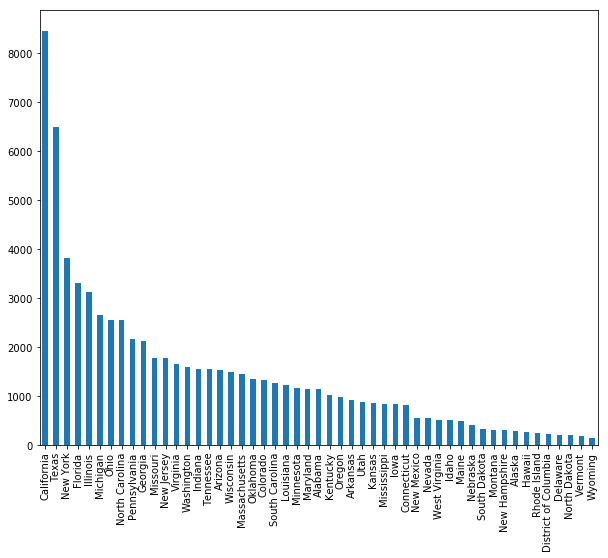

In [36]:
school_df['School State'].value_counts().plot.bar(figsize=(10, 8))

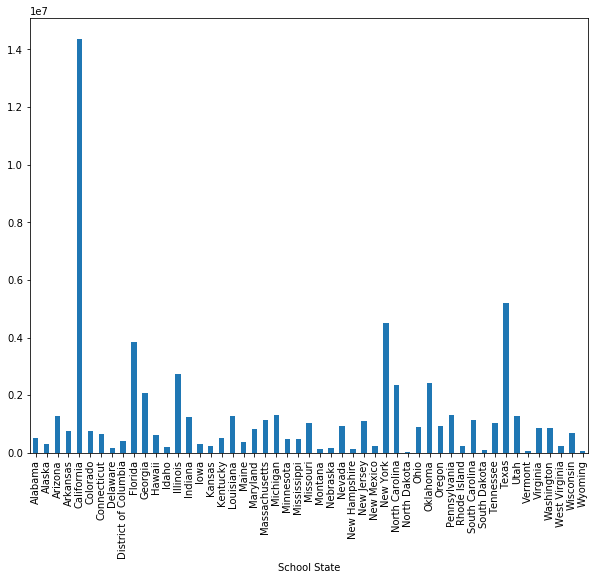

In [37]:
all_df.groupby('School State')['Project Cost'].sum().plot.bar(figsize=(10, 8))

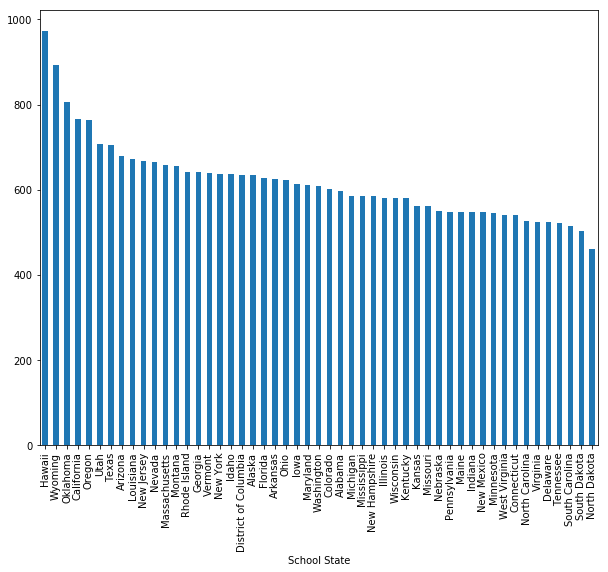

In [38]:
all_df.groupby('School State')['Project Cost'].mean().sort_values(ascending=False).plot.bar(figsize=(10, 8))

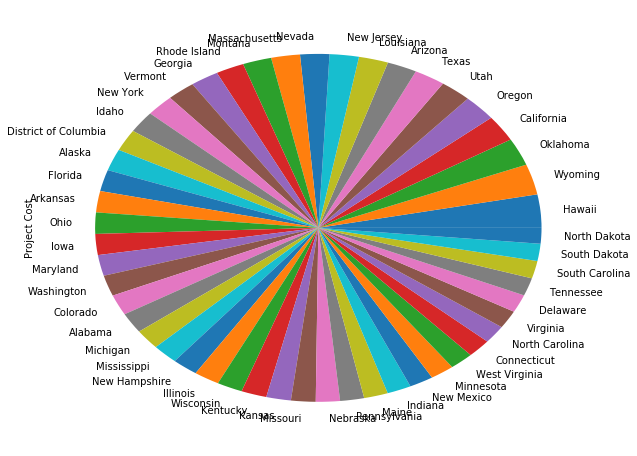

In [39]:
all_df.groupby('School State')['Project Cost'].mean().sort_values(ascending=False).plot.pie(figsize=(10, 8))

In [40]:
all_df['time_gap'] = all_df.apply(
    lambda x: 
    pd.to_datetime(x['Project Fully Funded Date']) - 
    pd.to_datetime(x['Project Posted Date']), axis=1)

In [41]:
all_df['time_gap'].head()

0   10 days
1   25 days
2    0 days
3   17 days
4    4 days
Name: time_gap, dtype: timedelta64[ns]

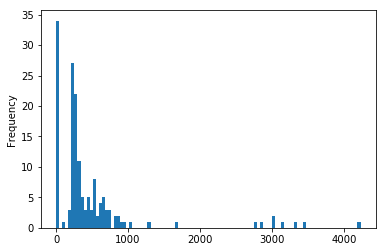

In [42]:
all_df['time_gap'].value_counts().plot.hist(bins=100)

In [43]:
all_df['time_gap'].value_counts()

1 days      4227
2 days      3447
3 days      3321
0 days      3165
4 days      3014
7 days      3013
6 days      2840
5 days      2765
8 days      1685
9 days      1275
10 days     1035
11 days      941
12 days      924
17 days      885
16 days      878
15 days      811
18 days      805
13 days      750
14 days      728
19 days      721
30 days      707
22 days      693
31 days      683
25 days      651
24 days      648
23 days      645
34 days      641
20 days      639
21 days      631
26 days      607
            ... 
124 days      16
147 days      15
143 days      15
126 days      15
137 days      14
148 days      14
145 days      14
129 days      13
131 days      13
138 days      13
125 days      13
133 days      12
144 days      11
140 days      11
134 days      11
142 days      10
141 days       9
136 days       9
127 days       9
132 days       8
139 days       8
135 days       7
149 days       6
130 days       4
151 days       2
152 days       1
159 days       1
150 days      

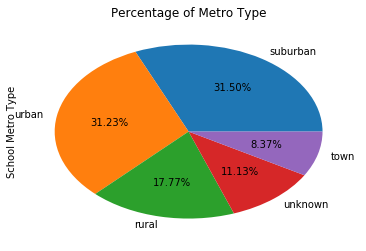

In [44]:
# matplotlib allows us to do more with our graphs (e.g., adding labels)
import matplotlib.pyplot as plt

school_df['School Metro Type'].value_counts().plot.pie(autopct='%1.2f%%')
plt.title('Percentage of Metro Type')

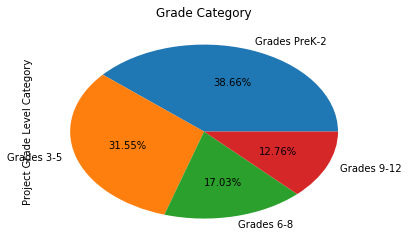

In [45]:
all_df['Project Grade Level Category'].value_counts().plot.pie(autopct='%1.2f%%')
plt.title('Grade Category')

In [46]:
proj_df.head()

,Unnamed: 0,Project ID,School ID,Teacher ID,Teacher Project Posted Sequence,Project Type,Project Title,Project Essay,Project Short Description,Project Need Statement,Project Subject Category Tree,Project Subject Subcategory Tree,Project Grade Level Category,Project Resource Category,Project Cost,Project Posted Date,Project Expiration Date,Project Current Status,Project Fully Funded Date,cost_euros
0,0,7685f0265a19d7b52a470ee4bac883ba,e180c7424cb9c68cb49f141b092a988f,4ee5200e89d9e2998ec8baad8a3c5968,25,Teacher-Led,Stand Up to Bullying: Together We Can!,Did you know that 1-7 students in grades K-12 ...,Did you know that 1-7 students in grades K-12 ...,"My students need 25 copies of ""Bullying in Sch...",Applied Learning,"Character Education, Early Development",Grades PreK-2,Technology,361.80,2013-01-01,2013-05-30,Fully Funded,2013-01-11,311
1,1,f9f4af7099061fb4bf44642a03e5c331,08b20f1e2125103ed7aa17e8d76c71d4,cca2d1d277fb4adb50147b49cdc3b156,3,Teacher-Led,Learning in Color!,"Help us have a fun, interactive listening cent...","Help us have a fun, interactive listening cent...","My students need a listening center, read alon...","Applied Learning, Literacy & Language","Early Development, Literacy",Grades PreK-2,Technology,512.85,2013-01-01,2013-05-31,Expired,NaN,441
2,2,afd99a01739ad5557b51b1ba0174e832,1287f5128b1f36bf8434e5705a7cc04d,6c5bd0d4f20547a001628aefd71de89e,1,Teacher-Led,Help Second Grade ESL Students Develop Languag...,Visiting or moving to a new place can be very ...,Visiting or moving to a new place can be very ...,My students need beginning vocabulary audio ca...,Literacy & Language,ESL,Grades PreK-2,Supplies,435.92,2013-01-01,2013-05-30,Fully Funded,2013-05-22,375
3,3,c614a38bb1a5e68e2ae6ad9d94bb2492,900fec9cd7a3188acbc90586a09584ef,8ed6f8181d092a8f4c008b18d18e54ad,40,Teacher-Led,Help Bilingual Students Strengthen Reading Com...,Students at our school are still working hard ...,Students at our school are still working hard ...,My students need one copy of each book in The ...,Literacy & Language,"ESL, Literacy",Grades 3-5,Books,161.26,2013-01-01,2013-05-31,Fully Funded,2013-02-06,139
4,4,ec82a697fab916c0db0cdad746338df9,3b200e7fe3e6dde3c169c02e5fb5ae86,893173d62775f8be7c30bf4220ad0c33,2,Teacher-Led,Help Us Make Each Minute Count!,"""Idle hands"" were something that Issac Watts s...","""Idle hands"" were something that Issac Watts s...","My students need items such as Velcro, two pou...",Special Needs,Special Needs,Grades 3-5,Supplies,264.19,2013-01-01,2013-05-30,Fully Funded,2013-01-01,227


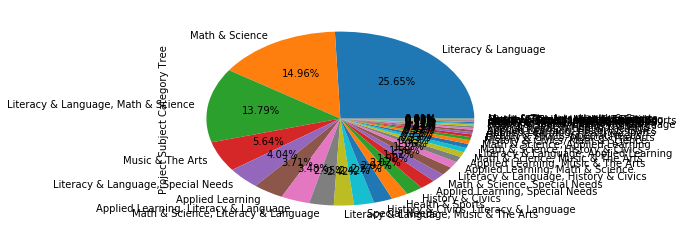

In [47]:
proj_df['Project Subject Category Tree'].value_counts().plot.pie(autopct='%1.2f%%')

In [48]:
proj_df['Project Subject Category Tree'].value_counts()

Literacy & Language                      25644
Math & Science                           14961
Literacy & Language, Math & Science      13790
Music & The Arts                          5635
Literacy & Language, Special Needs        4039
Applied Learning                          3706
Applied Learning, Literacy & Language     3475
Math & Science, Literacy & Language       2950
Literacy & Language, Music & The Arts     2417
Special Needs                             2416
History & Civics, Literacy & Language     2270
Health & Sports                           2026
History & Civics                          2020
Applied Learning, Special Needs           1898
Math & Science, Special Needs             1619
Literacy & Language, History & Civics     1581
Applied Learning, Math & Science          1215
Applied Learning, Music & The Arts        1057
Math & Science, Music & The Arts           934
Literacy & Language, Applied Learning      834
Math & Science, History & Civics           774
Math & Scienc

In [49]:
proj2_df = proj_df.dropna()

In [50]:
subjects = list(proj2_df[-proj2_df['Project Subject Category Tree'].dropna().str.contains(',')]['Project Subject Category Tree'].unique())
subjects

['Applied Learning',
 'Literacy & Language',
 'Special Needs',
 'Math & Science',
 'Health & Sports',
 'Music & The Arts',
 'History & Civics']

In [51]:
subject_df = pd.DataFrame()
subject_list = []
for subject in subjects:
    subject_df[subject] = proj_df['Project Subject Category Tree'].fillna('').str.contains(subject).apply(int).value_counts()
    subject_list += [subject] * subject_df.loc[0, subject]
subject_s = pd.Series(subject_list)

In [52]:
subject_df

,Applied Learning,Literacy & Language,Special Needs,Math & Science,Health & Sports,Music & The Arts,History & Civics
0,86184,42702,88901,62059,96180,88820,91606
1,13816,57298,11099,37941,3820,11180,8394


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022AC14D8D30>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000022AC264CF28>], dtype=object)

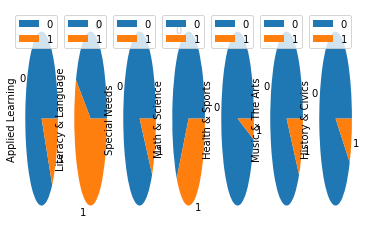

In [53]:
subject_df.plot.pie(subplots=True)

In [54]:
subject_s.value_counts()

Health & Sports        96180
History & Civics       91606
Special Needs          88901
Music & The Arts       88820
Applied Learning       86184
Math & Science         62059
Literacy & Language    42702
dtype: int64

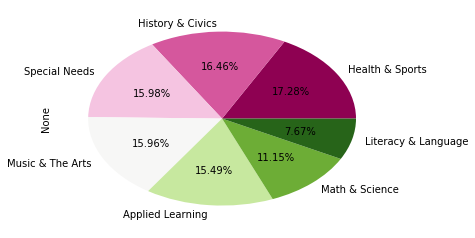

In [55]:
# colormaps: https://matplotlib.org/tutorials/colors/colormaps.html
subject_s.value_counts().plot.pie(colormap='PiYG', autopct='%1.2f%%')

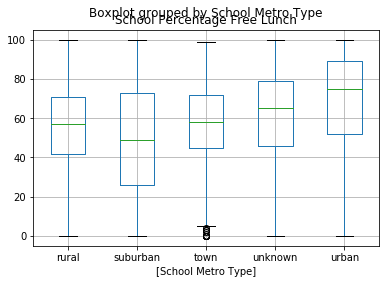

In [56]:
school_df[['School Metro Type', 'School Percentage Free Lunch']].boxplot(by='School Metro Type')

## Seaborn

Pandas plays well with a lot of very useful graphing libraries, often with a much easier means of generating useful plots.

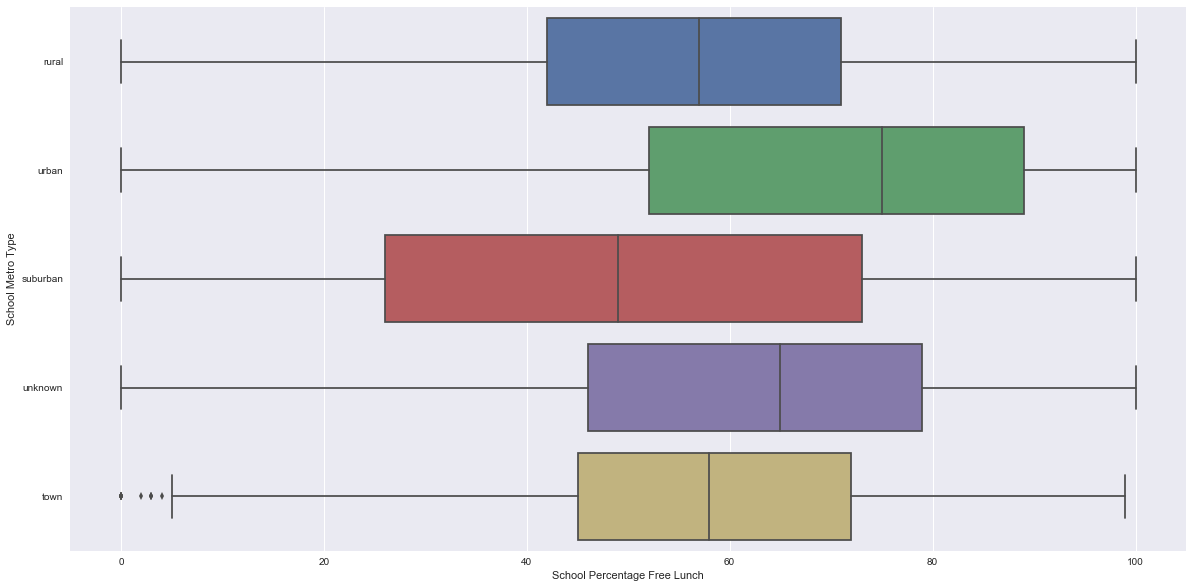

In [57]:
import seaborn as sns

sns.set(rc={'figure.figsize':(20,10)})
sns.boxplot(school_df['School Percentage Free Lunch'],school_df['School Metro Type'])

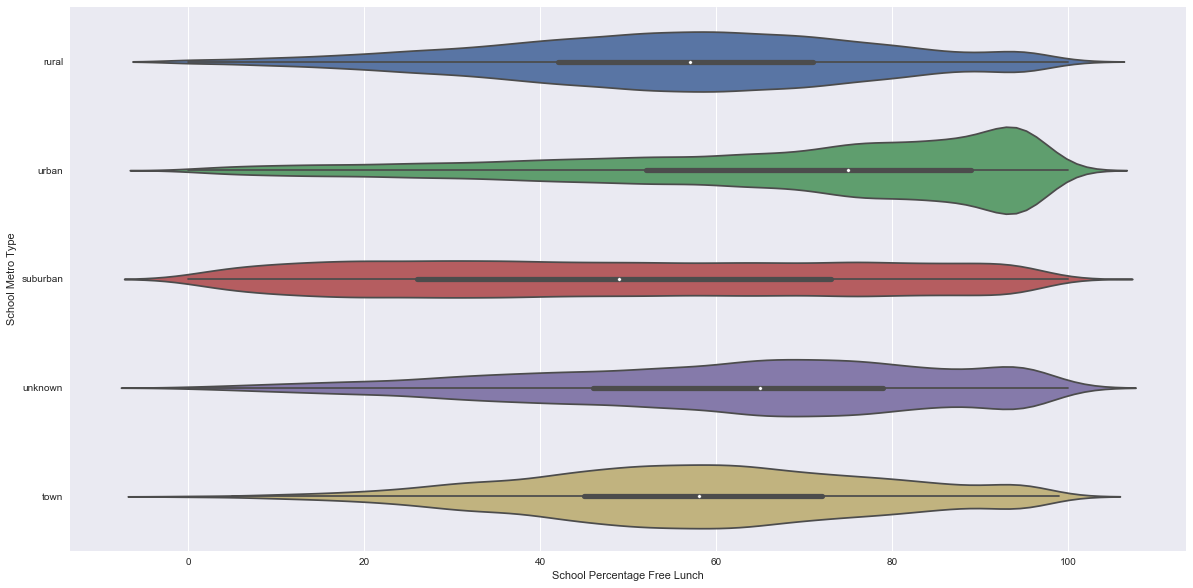

In [58]:
sns.violinplot(school_df['School Percentage Free Lunch'],school_df['School Metro Type'])